In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Suicide_Detection.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
suicide = df[df['class']=='suicide']
non_suicide = df[df['class']== 'non-suicide']
suicide = suicide.head(30000)
non_suicide = non_suicide.head(30000)
df = pd.concat([suicide,non_suicide])
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
...,...,...,...
59820,89731,She was only seventeen oh why are girls in son...,non-suicide
59821,89732,i wanna talk to something until i go to sleep ...,non-suicide
59822,89733,I know this is like super random but Fuck labe...,non-suicide
59825,89737,"Ok, I think I have officially decided That I a...",non-suicide


In [ ]:
!pip install tqdm
!pip install text_hammer
import text_hammer as th
!pip install --force-reinstall --no-deps beautifulsoup4==4.12.2


from tqdm import tqdm
import pandas as pd
import text_hammer as th

tqdm.pandas()

def text_preprocessing(df, col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x: str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return df

df = text_preprocessing(df, 'text')

  Using cached beautifulsoup4-4.9.1-py3-none-any.whl.metadata (4.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.5 MB/s eta 0:00:00
Using cached beautifulsoup4-4.9.1-py3-none-any.whl (115 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 106.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.2
    Uninstalling beautifulsoup4-4.12.2:
      Successfully uninstalled beautifulsoup4-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.

  Using cached beautifulsoup4-4.12.2-py3-none-any.whl.metadata (3.6 kB)
Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.1
    Uninstalling beautifulsoup4-4.9.1:
      Successfully uninstalled beautifulsoup4-4.9.1


100%|██████████| 60000/60000 [00:00<00:00, 626740.48it/s]


In [ ]:
df_preprocess = df.copy()
posts = df_preprocess.text.copy()

In [ ]:
def removeWordWithChar(text, char_list):
    #Remove words in a text that contains a char from the list.
    text = text.split()
    res = [ele for ele in text if all(ch not in ele for ch in char_list)]
    res = ' '.join(res)
    return res

char_list = ['@', '#', 'http', 'www', '/', '[]']

removeWordWithChar(posts[1], char_list)

posts_cleaned = []

for p in posts:
    posts_cleaned.append(removeWordWithChar(p, char_list))

In [ ]:
def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1):
            if len(text_tokens[i]) < 4:
                del (text_tokens[i])

        texts_tokens.append(text_tokens)

    return texts_tokens

In [ ]:
posts_tokens = tokenize(posts_cleaned)
posts_tokens[:1]

[['wife',
  'threatening',
  'suiciderecently',
  'left',
  'wife',
  'good',
  'because',
  'cheated',
  'twice',
  'lied',
  'much',
  'that',
  'have',
  'decided',
  'refuse',
  'back',
  'days',
  'began',
  'threatening',
  'suicide',
  'have',
  'tirelessly',
  'spent',
  'these',
  'paat',
  'days',
  'talking',
  'keeps',
  'hesitating',
  'because',
  'wants',
  'believe',
  'come',
  'back',
  'know',
  'people',
  'will',
  'threaten',
  'this',
  'order',
  'their',
  'what',
  'happens',
  'really',
  'does',
  'what',
  'supposed',
  'handle',
  'death',
  'hands',
  'still',
  'love',
  'wife',
  'cannot',
  'deal',
  'with',
  'getting',
  'cheated',
  'again',
  'constantly',
  'feeling',
  'insecure',
  'worried',
  'today',
  'does',
  'hope',
  'much',
  'doesnt',
  'happen']]

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)

    return texts_filtered

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
posts_filtered = removeSW(posts_tokens)
posts_filtered[:1]

[['wife',
  'threatening',
  'suiciderecently',
  'left',
  'wife',
  'good',
  'cheated',
  'twice',
  'lied',
  'much',
  'decided',
  'refuse',
  'back',
  'days',
  'began',
  'threatening',
  'suicide',
  'tirelessly',
  'spent',
  'paat',
  'days',
  'talking',
  'keeps',
  'hesitating',
  'wants',
  'believe',
  'come',
  'back',
  'know',
  'people',
  'threaten',
  'order',
  'happens',
  'really',
  'supposed',
  'handle',
  'death',
  'hands',
  'still',
  'love',
  'wife',
  'cannot',
  'deal',
  'getting',
  'cheated',
  'constantly',
  'feeling',
  'insecure',
  'worried',
  'today',
  'hope',
  'much',
  'doesnt',
  'happen']]

In [ ]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        texts_lem.append(text_lem)

    return texts_lem

In [ ]:
import nltk
import subprocess

try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

from nltk.corpus import wordnet

posts_lem = lemma(posts_filtered)

posts_lem[0]

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


['wife',
 'threaten',
 'suiciderecently',
 'leave',
 'wife',
 'good',
 'cheat',
 'twice',
 'lie',
 'much',
 'decide',
 'refuse',
 'back',
 'days',
 'begin',
 'threaten',
 'suicide',
 'tirelessly',
 'spend',
 'paat',
 'days',
 'talk',
 'keep',
 'hesitate',
 'want',
 'believe',
 'come',
 'back',
 'know',
 'people',
 'threaten',
 'order',
 'happen',
 'really',
 'suppose',
 'handle',
 'death',
 'hand',
 'still',
 'love',
 'wife',
 'cannot',
 'deal',
 'get',
 'cheat',
 'constantly',
 'feel',
 'insecure',
 'worry',
 'today',
 'hope',
 'much',
 'doesnt',
 'happen']

In [ ]:
posts_ready = []
for posts in posts_lem:
    string = ' '
    string = string.join(posts)
    posts_ready.append(string)

In [ ]:
df_preprocess['original_text'] = df['text']
df_preprocess['preprocessed_text'] = posts_ready
df_preprocess[['original_text', 'preprocessed_text', 'class']].head()

,original_text,preprocessed_text,class
0,ex wife threatening suiciderecently i left my ...,wife threaten suiciderecently leave wife good ...,suicide
3,i need helpjust help me im crying so hard,need helpjust help cry hard,suicide
4,im so losthello my name is adam 16 and ive bee...,losthello name adam struggle years afraid past...,suicide
5,honetly idki dont know what im even doing here...,honetly idki dont know even feel like nothing ...,suicide
6,trigger warning excuse for self inflicted burn...,trigger warn excuse self inflict burnsi know c...,suicide


In [ ]:
data = [{'text': text, 'class': label} for text, label in zip(posts_ready, df['class'])]

# Convert the list of dictionaries to a DataFrame
df_ready = pd.DataFrame(data)

X = df_ready['text']
y = df_ready['class']

df_ready

,text,class
0,wife threaten suiciderecently leave wife good ...,suicide
1,need helpjust help cry hard,suicide
2,losthello name adam struggle years afraid past...,suicide
3,honetly idki dont know even feel like nothing ...,suicide
4,trigger warn excuse self inflict burnsi know c...,suicide
...,...,...
59995,seventeen girls songs always seventeen movie s...,non-suicide
59996,wanna talk something sleep check recent post h...,non-suicide
59997,know like super random fuck label wantas long ...,non-suicide
59998,think officially decide satanistthe satanic te...,non-suicide


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to numerical format
y_train = y_train.apply(lambda x: 1 if x == 'suicide' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'suicide' else 0)

# Define the RNN model
embedding_dim = 100 # This should match the dimension of your loaded glove embeddings
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=30000, output_dim=embedding_dim, input_length=150))
model_rnn.add(SpatialDropout1D(0.2))
model_rnn.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_delta=0.0001)
]

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


600/600 ━━━━━━━━━━━━━━━━━━━━ 201s 328ms/step - accuracy: 0.6270 - loss: 0.6369 - val_accuracy: 0.8602 - val_loss: 0.3536 - learning_rate: 0.0010
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 197s 328ms/step - accuracy: 0.8829 - loss: 0.3100 - val_accuracy: 0.9186 - val_loss: 0.2219 - learning_rate: 0.0010
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 202s 328ms/step - accuracy: 0.9290 - loss: 0.1971 - val_accuracy: 0.9255 - val_loss: 0.2018 - learning_rate: 0.0010
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 202s 328ms/step - accuracy: 0.9458 - loss: 0.1550 - val_accuracy: 0.9241 - val_loss: 0.2005 - learning_rate: 0.0010
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 201s 326ms/step - accuracy: 0.9589 - loss: 0.1192 - val_accuracy: 0.9211 - val_loss: 0.2136 - learning_rate: 0.0010
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 204s 329ms/step - accuracy: 0.9684 - loss: 0.0966 - val_accuracy: 0.9226 - val_loss: 0.2273 - learning_rate: 0.0010
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 201s 328ms/step - accuracy: 0.9729 

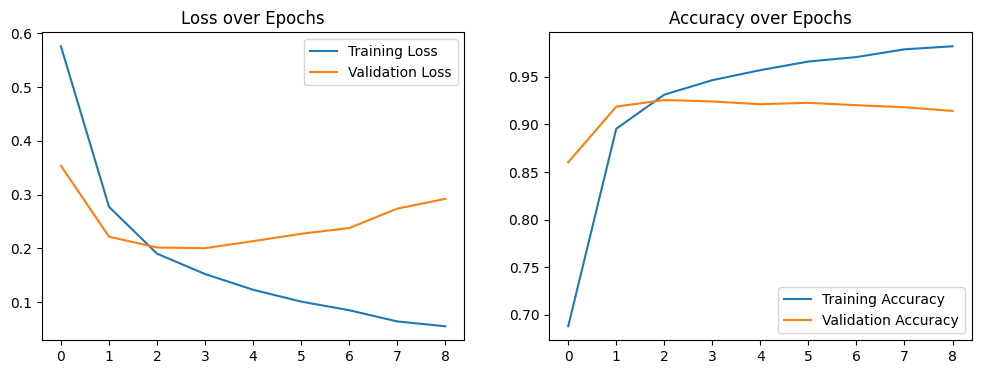

In [ ]:
# Plotting Training and Validation Loss & Accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predicting on test set
y_pred_rnn = model_rnn.predict(X_test)
y_pred_classes_rnn = (y_pred_rnn > 0.5).astype("int32")  # Converting probabilities to binary

# Printing Classification Report
print("RNN Classification Report:\n")
print(classification_report(y_test, y_pred_classes_rnn, target_names=['non-suicide', 'suicide']))

375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step
RNN Classification Report:

              precision    recall  f1-score   support

 non-suicide       0.90      0.92      0.91      6091
     suicide       0.92      0.90      0.91      5909

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000

